# 1. YOLO

1. `ultralytics.engine.model.Model(model="yolo11n.pt", task=None, verbose=False)`
    - Attributes
        - `callbacks`
        - `predictor`
    - Methods
        - `val(validator=None, **kwargs)`: Validates the model using a specified dataset and validation configuration. Returns a `ultralytics.utils.metrics.DetMetrics` for a detection task.
2. `ultralytics.utils.metrics.DetMetrics(save_dir=Path('.'), plot=False, on_plot=None, names={})`: Utility class for computing detection metrics.
    - Attributes
        - `plot`
        - `box`
    - Methods
4. `ultralytics.engine.results.Results(orig_img, path, names, boxes=None, masks=None, probs=None, keypoints=None, obb=None, speed=None)`
    - `orig_img`
    - `orig_shape`

YOLO series as follows:
- [You Only Look Once: Unified, Real-Time Object Detection](https://arxiv.org/abs/1506.02640) by Joseph Redmon
- [YOLO9000: Better, Faster, Stronger](https://arxiv.org/abs/1612.08242) by Joseph Redmon
- [YOLOv3: An Incremental Improvement](https://arxiv.org/abs/1804.02767) by Joseph Redmon
- [YOLOv4: Optimal Speed and Accuracy of Object Detection](https://arxiv.org/abs/2004.10934) by Alexey Bochkovskiy, Chien-Yao Wang
- [Scaled-YOLOv4: Scaling Cross Stage Partial Network](https://arxiv.org/abs/2011.08036) by Chien-Yao Wang, Alexey Bochkovskiy
- [Comprehensive Guide to Ultralytics YOLOv5](https://docs.ultralytics.com/yolov5/) by Ultralytics
- [You Only Learn One Representation: Unified Network for Multiple Tasks](https://arxiv.org/abs/2105.04206) by Chien-Yao Wang
- [YOLOX: Exceeding YOLO Series in 2021](https://arxiv.org/abs/2107.08430) by Megvii Technology
- [YOLOv7: Trainable Bag-of-Freebies Sets New State-of-the-Art for Real-Time Object Detectors](https://arxiv.org/abs/2207.02696) by Chien-Yao Wang & Alexey Bochkovskiy
- [YOLOv6: A Single-Stage Object Detection Framework for Industrial Applications](https://arxiv.org/abs/2209.02976) by Meituan Vision
- [Ultralytics YOLOv8](https://docs.ultralytics.com/models/yolov8/) by Ultralytics
- [YOLO-NAS](https://github.com/Deci-AI/super-gradients/blob/master/YOLONAS.md) by Deci
- [YOLO-World: Real-Time Open-Vocabulary Object Detection](https://arxiv.org/abs/2401.17270) by Tencent AI Lab
- [YOLOv9: Learning What You Want to Learn Using Programmable Gradient Information](https://arxiv.org/abs/2402.13616) by Chien-Yao Wang
- [YOLOv10: Real-Time End-to-End Object Detection](https://arxiv.org/abs/2405.14458) by Tsinghua University
- [Ultralytics YOLO11](https://docs.ultralytics.com/models/yolo11/) by Ultralytics

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.7 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
Setup complete ✅ (32 CPUs, 125.5 GB RAM, 1604.0/1641.0 GB disk)


In [6]:
# Update `.config/Ultralytics/settings.json` & `.config/Ultralytics/settings.yaml` files if required
!yolo settings

JSONDict("/home/yungshun317/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/home/yungshun317/workspace/py/torch-cv/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "8bc208799e1b355670df79bf44d8a146a3aff8679ab599505a7778e8b8dc920f",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": true,
  "wandb": true,
  "vscode_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


## 1-1. YOLOv3
- [YOLOv3, YOLOv3-Ultralytics, and YOLOv3u](https://docs.ultralytics.com/models/yolov3/)

In [4]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv3n model
model = YOLO("yolov3.pt")

# Display model information
model.info()

PRO TIP 💡 Replace 'model=yolov3.pt' with new 'model=yolov3u.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|████████████████████████████████████████| 198M/198M [00:09<00:00, 22.1MB/s]


YOLOv3 summary: 310 layers, 103,754,144 parameters, 0 gradients, 283.3 GFLOPs


(310, 103754144, 0, 283.3201664)

In [5]:
# Inspect the model
print(model)

# View attributes of the model
# from pprint import pprint
# pprint(vars(model))

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): Bottleneck(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, mome


image 1/1 /home/yungshun317/workspace/py/torch-cv/data/cat_dog_image.jpg: 640x640 1 cat, 1 dog, 19.5ms
Speed: 17.6ms preprocess, 19.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

Results:
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife

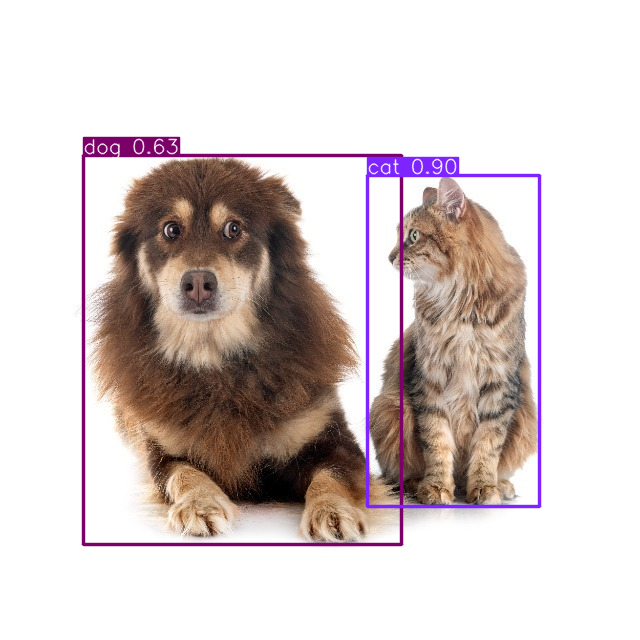

In [25]:
# Prediction
import torch, cv2
import matplotlib.pyplot as plt

results = model("data/cat_dog_image.jpg")
print()
print("Results:")
print(results)
print()

for result in results:
    print("Boxes:")
    print(result.boxes)
    result.show()
    result.save(filename="outputs/result.jpg")

In [52]:
# Validation
results = model.val(data="coco8.yaml", imgsz=640)
print()
print("mAP:", results.box.map)

Ultralytics 8.3.7 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)


val: Scanning /home/yungshun317/workspace/py/onnx-tensorrt-inference/yolov5/yolo
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all          4         17      0.869      0.897      0.974       0.76
                person          3         10          1      0.427      0.869      0.496
                   dog          1          1      0.798          1      0.995      0.895
                 horse          1          2      0.835          1      0.995      0.677
              elephant          1          2          1      0.957      0.995      0.698
              umbrella          1          1      0.739          1      0.995      0.995
          potted plant          1          1      0.838          1      0.995      0.796
Speed: 0.2ms preprocess, 18.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val7

mAP: 0.7595557966339216


## 1-2. YOLOv4
- [darknet](https://github.com/AlexeyAB/darknet) by AlexeyAB

## 1-3. YOLOv5

## 1-4. YOLOv6

## 1-5. YOLOv7

## 1-8. YOLOv8

In [5]:
# Load YOLOv8 models
yolov8n_model = YOLO("yolov8n.pt")
yolov8s_model = YOLO("yolov8s.pt")
yolov8m_model = YOLO("yolov8m.pt")
yolov8l_model = YOLO("yolov8l.pt")
yolov8x_model = YOLO("yolov8x.pt")

# Display model information
print(yolov8n_model.info())
print(yolov8s_model.info())
print(yolov8m_model.info())
print(yolov8l_model.info())
print(yolov8x_model.info())

100%|██████████████████████████████████████| 21.5M/21.5M [00:02<00:00, 9.15MB/s]


100%|██████████████████████████████████████| 83.7M/83.7M [00:02<00:00, 31.2MB/s]


YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
(225, 3157200, 0, 8.8575488)
YOLOv8s summary: 225 layers, 11,166,560 parameters, 0 gradients, 28.8 GFLOPs
(225, 11166560, 0, 28.816844800000002)
YOLOv8m summary: 295 layers, 25,902,640 parameters, 0 gradients, 79.3 GFLOPs
(295, 25902640, 0, 79.3204224)
YOLOv8l summary: 365 layers, 43,691,520 parameters, 0 gradients, 165.7 GFLOPs
(365, 43691520, 0, 165.742848)
YOLOv8x summary: 365 layers, 68,229,648 parameters, 0 gradients, 258.5 GFLOPs
(365, 68229648, 0, 258.5472512)


In [6]:
# Inspect the model
print(yolov8m_model)

# View attributes of the model
# from pprint import pprint
# pprint(vars(model))

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_

In [7]:
# Train
results = yolov8m_model.train(data="coco128.yaml", epochs=100, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.7 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=coco128.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

train: Scanning /home/yungshun317/workspace/py/onnx-tensorrt-inference/yolov5/yo


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /home/yungshun317/workspace/py/onnx-tensorrt-inference/yolov5/yolo


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 83 weight(decay=0.0), 90 weight(decay=0.0005), 89 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.53G     0.9584       4.97      1.122        194        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929    5.1e-05    0.00771   0.000272    0.00014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.46G     0.9663      4.948      1.118        188        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   5.94e-05    0.00898    0.00035   0.000193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.54G     0.9213      4.873      1.125        186        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   5.87e-05    0.00887   0.000386    0.00022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.63G     0.8927      4.819      1.099        167        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   6.16e-05    0.00932   0.000464   0.000279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.64G     0.8859      4.726      1.067        209        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   6.49e-05    0.00981   0.000583   0.000364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.63G     0.8395      4.613      1.061        228        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   7.74e-05     0.0117    0.00132    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.56G     0.8328      4.498      1.045        218        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   7.92e-05      0.012    0.00446    0.00365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.54G     0.8047      4.485      1.049        210        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   8.11e-05     0.0123    0.00588    0.00492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.61G     0.8241      4.502      1.052        173        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   8.18e-05     0.0124    0.00666    0.00561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.59G     0.7764       4.35      1.019        188        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   0.000388     0.0134    0.00722      0.006



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.64G     0.8058      4.171      1.043        186        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0278    0.00401    0.00914    0.00742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.48G     0.7887      4.131      1.066        169        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0279    0.00343     0.0116    0.00947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.47G     0.7829      4.038      1.047        124        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0417    0.00524     0.0212      0.018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.44G      0.853      3.929      1.049        273        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0633     0.0356     0.0515     0.0398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.54G     0.8247      3.819      1.032        273        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0474     0.0691     0.0627     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.55G     0.8738      3.642      1.062        176        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929       0.05      0.113     0.0821     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.48G     0.7777      3.631      1.038        321        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.148      0.224      0.162      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.56G     0.8732       3.41      1.049        194        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.115      0.341      0.169      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.47G     0.8372      3.366      1.062        293        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0948      0.418      0.192      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.47G     0.8169      3.145      1.063        203        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929     0.0766      0.507      0.214      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       7.5G     0.8765      3.081      1.045        214        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929     0.0537      0.554      0.233      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.48G     0.8455      2.992       1.03        269        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.584      0.154      0.262      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       7.5G     0.8163      2.796      1.041        148        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.549      0.214      0.299      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.54G     0.8215       2.76      1.033        255        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.568      0.263      0.329      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.54G     0.8679      2.533      1.023        212        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.57      0.297      0.352      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.52G     0.8312      2.453      1.027        284        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.509      0.324      0.358      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.44G     0.8492       2.36      1.055        219        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.473      0.329      0.368      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.48G     0.7892      2.372       1.03        198        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.413      0.375      0.378      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.61G      0.786        2.2      1.009        244        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.502      0.363       0.41      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.52G     0.8057      2.294      1.018        238        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.53      0.383      0.432      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.57G     0.8351      2.185      1.013        236        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.566      0.388      0.442      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.56G     0.8037      2.099      1.002        262        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.547      0.456      0.472      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.54G     0.7866      2.018      1.002        234        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.562      0.468      0.492      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.56G     0.7879      1.886      1.014        211        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.56      0.487      0.504      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.47G     0.8358      1.988      1.017        286        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.597      0.501      0.517      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.53G     0.8124       1.85      1.028        253        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.635       0.52      0.546      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.53G     0.7722      1.821      1.015        193        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.685      0.488      0.565      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.49G     0.8295      1.883      1.012        309        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.669      0.502      0.568      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.55G     0.8196      1.867      1.013        254        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.61      0.525      0.573      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.48G     0.7747       1.75      1.038        142        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.63      0.528      0.584      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.47G     0.7461      1.687     0.9926        204        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.632      0.572      0.607      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.54G     0.7395      1.651     0.9842        248        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.65      0.582      0.627      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.48G     0.7572       1.72      1.006        366        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.752      0.566      0.643      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       7.5G     0.7575      1.558     0.9958        189        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.739      0.583       0.66       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.53G     0.7422      1.533     0.9803        241        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.743      0.592      0.674      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.53G     0.7311      1.509     0.9932        220        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.726      0.604       0.69      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.55G     0.7115      1.466     0.9745        276        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.721       0.62      0.701      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.51G     0.7192      1.492     0.9628        272        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.718      0.626      0.707      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.56G     0.6844      1.441     0.9655        138        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.683      0.648      0.717      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.64G     0.6973      1.461     0.9757        214        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.704      0.648      0.728      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.54G     0.7199      1.471     0.9701        199        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.702      0.662      0.748      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.56G     0.6878      1.405     0.9644        204        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.719      0.671      0.752      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.56G     0.7126      1.413     0.9857        320        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.748      0.681       0.77       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.54G     0.6737      1.327     0.9801        206        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.748      0.689       0.77      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.56G     0.6786      1.352       0.98        251        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.769      0.675      0.774      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.55G     0.6734      1.309     0.9759        244        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.74      0.698      0.779      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.54G     0.6666      1.328     0.9913        136        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.722      0.723      0.787      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.62G     0.6708       1.32     0.9539        203        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.745      0.697      0.787      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.55G      0.669      1.237     0.9757        219        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.714      0.725      0.804      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.48G     0.6701       1.26     0.9742        183        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.755      0.719      0.811      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.55G     0.6287      1.232     0.9473        171        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.768      0.749      0.817      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.55G     0.6617      1.178     0.9486        256        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.792      0.737      0.822      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.58G     0.6673      1.236       0.96        171        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.813      0.735      0.832      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.57G     0.6217      1.209      0.942        203        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.805      0.746      0.834      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.46G     0.6347       1.19     0.9487        292        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.816      0.743       0.84      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.48G     0.6013      1.136     0.9421        192        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.816      0.749      0.841      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.45G     0.6134      1.167     0.9378        244        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.738      0.802      0.842       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.48G     0.6289      1.141     0.9606        227        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.755      0.797      0.843      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.51G     0.5998      1.131     0.9309        277        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.788      0.784      0.845      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.54G     0.6091      1.092     0.9529        167        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.841       0.77      0.847      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.49G     0.6368      1.139     0.9657        160        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.822      0.781      0.849      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.48G     0.5975      1.064     0.9416        207        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.823      0.793      0.851      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.52G     0.6124      1.126     0.9443        220        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.807      0.801      0.852      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.59G     0.5854      1.048     0.9123        180        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.834      0.794      0.852      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.57G     0.6097      1.103     0.9331        247        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.834      0.801      0.858      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.47G     0.6041      1.069     0.9469        207        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.846      0.801      0.862      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.51G     0.5969      1.047     0.9322        198        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.854       0.81      0.867       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.58G     0.5711     0.9976     0.9383        189        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.861       0.81      0.864      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.46G     0.6157      1.102      0.952        221        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.86      0.818      0.868      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.55G     0.5666      1.036     0.9346        152        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.873      0.817      0.872       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.53G     0.6084      1.047      0.941        166        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.871      0.822       0.88      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.45G     0.5947      1.041     0.9346        265        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.873      0.818      0.887      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.55G     0.5674      1.031     0.9163        185        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.875      0.819      0.889      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.48G     0.6039      1.008     0.9464        208        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.882      0.819      0.894      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.52G     0.5795       1.09     0.9227        361        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.882      0.815      0.891      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.44G     0.5703      1.021     0.9465        232        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.888      0.814      0.893       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.44G     0.5801     0.9801     0.9554        177        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.891      0.815      0.896      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.45G     0.5933      1.038     0.9395        203        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.886      0.822      0.904      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.66G     0.5527      1.021      0.926        301        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.889      0.821      0.905       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.62G     0.5787     0.9945     0.9206        204        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.891      0.822      0.898      0.816
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.45G     0.5374      1.039     0.8723        171        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.886      0.824      0.902      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.44G     0.5445      1.069     0.9299        130        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.875      0.829      0.894      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.54G     0.5343      1.001     0.8991        122        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.862      0.834      0.893      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.56G     0.5353      0.985     0.8877        122        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.853      0.828      0.887      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.45G     0.5289     0.9653     0.8989        126        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.853      0.827      0.885      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.53G     0.5082     0.9813     0.8744        121        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.86      0.827      0.894      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.44G     0.5082     0.9694     0.8659        102        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.857      0.829      0.894      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.45G     0.4944     0.9658     0.8715        125        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.857      0.825       0.89      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.43G     0.5376      1.012     0.8955         73        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.857      0.823      0.889      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.48G     0.5024     0.9852      0.869         77        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.858      0.818      0.889      0.808

100 epochs completed in 0.089 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 46.9MB
Optimizer stripped from runs/detect/train/weights/best.pt, 46.9MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.7 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
Model summary (fused): 236 layers, 23,249,152 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.889      0.821      0.905      0.821
                person         61        254      0.982      0.894      0.953       0.83
               bicycle          3          6          1      0.416      0.837       0.72
                   car         12         46      0.802      0.587      0.698      0.429
            motorcycle          4          5      0.913          1      0.995      0.976
              airplane          5          6      0.947          1      0.995      0.979
                   bus          5          7      0.903      0.714      0.874      0.849
                 train          3          3      0.893          1      0.995      0.995
                 truck          5         12        0.7        0.5      0.701      0.616
                  boat          2          6          1      0.631      0.846      0.714
         traffic light          4         14          1      0.398      0.446      0.323
             stop sig

In [8]:
# Validation
results = yolov8m_model.val(data="coco128.yaml", imgsz=640)
print()
print("mAP:", results.box.map)

Ultralytics 8.3.7 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
Model summary (fused): 236 layers, 23,249,152 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /home/yungshun317/workspace/py/onnx-tensorrt-inference/yolov5/yolo
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.892      0.813      0.898      0.817
                person         61        254      0.979      0.886      0.953      0.827
               bicycle          3          6          1       0.38      0.837       0.72
                   car         12         46      0.788      0.587      0.698      0.428
            motorcycle          4          5      0.916          1      0.995      0.976
              airplane          5          6      0.951          1      0.995      0.995
                   bus          5          7      0.907      0.714      0.872      0.847
                 train          3          3      0.899          1      0.995      0.995
                 truck          5         12      0.709        0.5      0.673      0.584
                  boat          2          6          1      0.624      0.847      0.714
         traffic light          4         14          1      0.408      0.444      0.321
             stop sig


image 1/1 /home/yungshun317/workspace/py/torch-cv/data/cat_dog_image.jpg: 640x640 2 cats, 1 dog, 20.6ms
Speed: 0.9ms preprocess, 20.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

Results:
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife

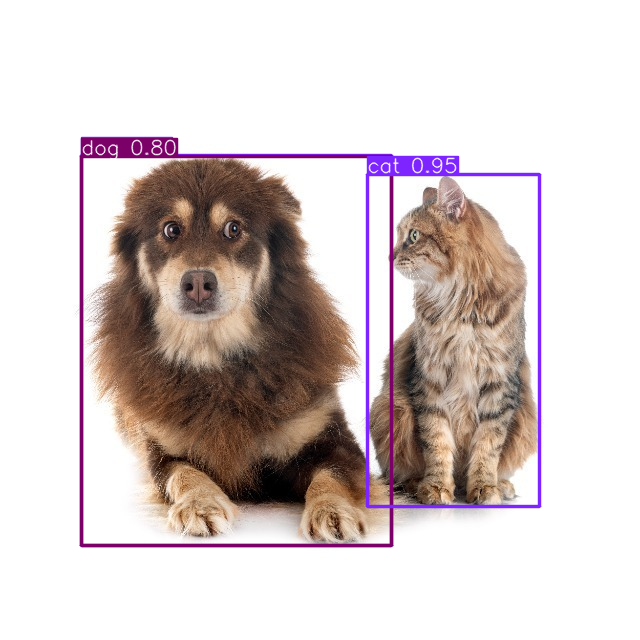

In [9]:
# Prediction
import torch, cv2
import matplotlib.pyplot as plt

results = model("data/cat_dog_image.jpg")
print()
print("Results:")
print(results)
print()

for result in results:
    print("Boxes:")
    print(result.boxes)
    result.show()
    result.save(filename="outputs/result.jpg")

## 1-11. YOLO11

In [1]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv3n model
yolo11n_model = YOLO("yolo11n.pt")
yolo11s_model = YOLO("yolo11s.pt")
yolo11m_model = YOLO("yolo11m.pt")
yolo11l_model = YOLO("yolo11l.pt")
yolo11x_model = YOLO("yolo11x.pt")

# Display model information
print(yolo11n_model.info())
print(yolo11s_model.info())
print(yolo11m_model.info())
print(yolo11l_model.info())
print(yolo11x_model.info())

YOLO11n summary: 319 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs
(319, 2624080, 0, 6.614336)
YOLO11s summary: 319 layers, 9,458,752 parameters, 0 gradients, 21.7 GFLOPs
(319, 9458752, 0, 21.718374400000002)
YOLO11m summary: 409 layers, 20,114,688 parameters, 0 gradients, 68.5 GFLOPs
(409, 20114688, 0, 68.52838399999999)
YOLO11l summary: 631 layers, 25,372,160 parameters, 0 gradients, 87.6 GFLOPs
(631, 25372160, 0, 87.6134912)
YOLO11x summary: 631 layers, 56,966,176 parameters, 0 gradients, 196.0 GFLOPs
(631, 56966176, 0, 195.9587328)


In [10]:
from ultralytics import YOLO
yolo11m_model = YOLO("yolo11m.pt")

In [2]:
# Inspect the model
print(yolo11m_model)

# View attributes of the model
# from pprint import pprint
# pprint(vars(model))

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_

In [14]:
# Trainoco128
results = yolo11m_model.train(data="coco128.yaml", epochs=10, imgsz=640)

Ultralytics 8.3.20 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=coco128.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

train: Scanning /home/yungshun317/workspace/py/torch-cv/datasets/coco128/labels/

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/yungshun317/workspace/py/torch-cv/datasets/coco128/labels/tr


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      8.91G      3.094      4.747       2.96        127        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.302   0.000669    0.00145   0.000557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.89G      2.985       4.65      2.839        113        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929    0.00245     0.0284     0.0054    0.00228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      8.79G      2.957      4.563      2.794        119        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0181     0.0471     0.0212     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      8.88G      2.815      4.472      2.681         68        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0308     0.0807     0.0512     0.0293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      8.84G      2.796      4.447      2.685         95        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.082      0.106     0.0978     0.0462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.83G      2.646      4.351      2.593        120        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.084      0.124      0.106     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.87G      2.584      4.365      2.523         71        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0867      0.164       0.13     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      8.94G      2.555      4.285      2.495        142        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0958      0.174      0.147     0.0804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      8.94G      2.455      4.173      2.412        111        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.113      0.188      0.166     0.0922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      8.81G      2.445      4.162      2.382        167        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.11      0.186      0.159     0.0938

10 epochs completed in 0.010 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.20 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
YOLO11m summary (fused): 303 layers, 20,091,712 parameters, 0 gradients, 68.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.125      0.187      0.166     0.0998
                person         61        254     0.0095      0.654      0.342      0.194
               bicycle          3          6          1      0.167      0.583      0.117
                   car         12         46     0.0556     0.0217     0.0289     0.0202
            motorcycle          4          5      0.429        0.6      0.583      0.308
              airplane          5          6      0.333      0.167      0.304      0.174
                   bus          5          7      0.143      0.143      0.206     0.0595
                 train          3          3          0          0          0          0
                 truck          5         12          0          0          0          0
                  boat          2          6          0          0          0          0
         traffic light          4         14          1     0.0714      0.536      0.375
             stop sig

In [5]:
print(results)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a1d95f7af90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [15]:
# Validation
results = yolo11m_model.val(data="coco128.yaml", imgsz=640)
print()
print("mAP:", results.box.map)

Ultralytics 8.3.20 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
YOLO11m summary (fused): 303 layers, 20,091,712 parameters, 0 gradients, 68.0 GFLOPs


val: Scanning /home/yungshun317/workspace/py/torch-cv/datasets/coco128/labels/tr
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.123      0.195      0.169      0.102
                person         61        254    0.00956      0.654      0.352      0.196
               bicycle          3          6          1      0.167      0.583      0.117
                   car         12         46     0.0556     0.0217     0.0288     0.0201
            motorcycle          4          5      0.429        0.6      0.583      0.308
              airplane          5          6       0.25      0.167       0.27      0.153
                   bus          5          7      0.167      0.143      0.216     0.0645
                 train          3          3          0          0          0          0
                 truck          5         12        0.1     0.0833      0.131     0.0131
                  boat          2          6          0          0          0          0
         traffic light          4         14          1     0.0714      0.536      0.375
             stop sig


image 1/1 /home/yungshun317/workspace/py/torch-cv/data/cat_dog_image.jpg: 640x640 2 cats, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

Results:
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 's

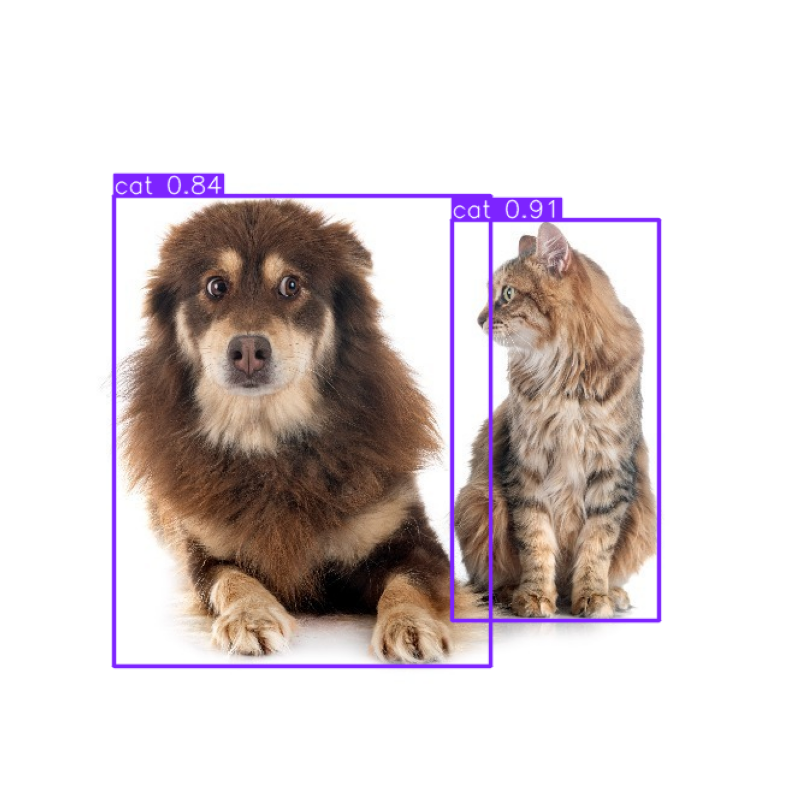

In [36]:
# Prediction
import torch, cv2
%matplotlib inline
import matplotlib.pyplot as plt

results = yolo11m_model("data/cat_dog_image.jpg")
print()
print("Results:")
print(results)
print()

for result in results:
    print("Boxes:")
    print(result.boxes)
    
    # result.show()
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Display images with matplotlib 
    result.save(filename="outputs/result.jpg")